<a href="https://colab.research.google.com/github/Bluseass/LLa/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%221_5_%D0%BB%D0%B0%D0%B1%D0%B0ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Экстремум функции: -0.6909830056250525
Значение функции в экстремуме: -0.5810513166400795


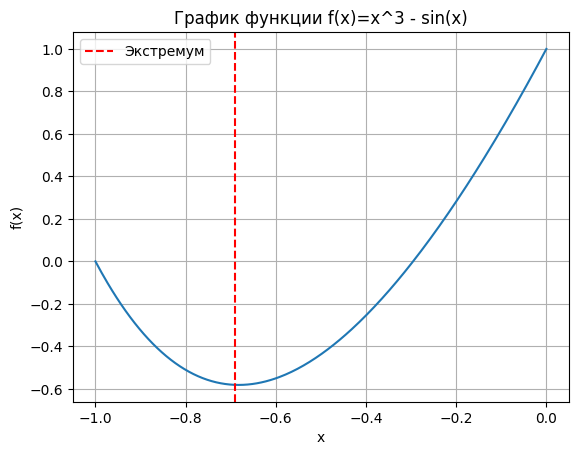

      y weightA    Fa    Fb    x/   x//    Lx  ratio  iterpoint
0    -1       0 -0.56 -0.21 -0.62 -0.38     1   0.38       0.62
1    -1   -0.38 -0.55 -0.56 -0.76 -0.62  0.62   0.38       0.62
2 -0.76   -0.38 -0.56 -0.48 -0.62 -0.53  0.38   0.38       0.62
3 -0.76   -0.53 -0.58 -0.56 -0.67 -0.62  0.24   0.38       0.62
4 -0.76   -0.62 -0.58 -0.58 -0.71 -0.67  0.15   0.38       0.62
5 -0.71   -0.62 -0.58 -0.58 -0.67 -0.65  0.09   0.38       0.62
6 -0.71   -0.65 -0.58 -0.58 -0.69 -0.67  0.06   0.38       0.62


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**4 + 2*x**2 + 4*x + 1

def golden_section_search(f, a, b, epsilon):
    golden_ratio = (np.sqrt(5) - 1) / 2  # Золотое сечение
    x1 = b - golden_ratio * (b - a)
    x2 = a + golden_ratio * (b - a)
    f1 = f(x1)
    f2 = f(x2)

    df1 = pd.DataFrame(columns=['y', 'weightA', 'Fa', 'Fb', 'x/', 'x//', 'Lx', 'ratio', 'iterpoint'])

    while abs(b - a) > epsilon:

        df1 = pd.concat([df1, pd.DataFrame({'y': [round(a, 2)], 'weightA': [round(b, 2)], 'Fa': [round(f1, 2)], 'Fb':[round(f2, 2)],
                                            'x/': [round(x1, 2)], 'x//': [round(x2, 2)], 'ratio': [round(1-golden_ratio, 2)],
                                            'iterpoint': [round(golden_ratio, 2)],'Lx': [round(abs(b-a), 2)]})], ignore_index=True)

        if f1 < f2:
            b = x2
            x2 = x1
            f2 = f1
            x1 = b - golden_ratio * (b - a)
            f1 = f(x1)
        else:
            a = x1
            x1 = x2
            f1 = f2
            x2 = a + golden_ratio * (b - a)
            f2 = f(x2)

    return (a + b) / 2, df1

a = -1
b = 0
epsilon = 0.05

extremum, df1 = golden_section_search(f, a, b, epsilon)
extremum_value = f(extremum)

print("Экстремум функции:", extremum)
print("Значение функции в экстремуме:", extremum_value)

x = np.linspace(-1, 0, 300)
y = f(x)

plt.plot(x, y)
plt.axvline(x=extremum, color='r', linestyle='--', label='Экстремум')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('График функции f(x)=x^3 - sin(x)')
plt.legend()
plt.grid(True)
plt.show()

print(df1)

1.8   2.8   2.8800000000000003   2.88   -4   -4
2.2800000000000002   3.28   1.0368   1.04   -2.4   -2.4000000000000004
2.568   3.568   0.3732479999999999   0.37   -1.4399999999999995   -1.4400000000000004
2.7408   3.7408   0.13436927999999987   0.13   -0.8639999999999999   -0.8639999999999999
2.84448   3.84448   0.04837294080000006   0.05   -0.5183999999999997   -0.5183999999999997
2.906688   3.906688   0.017414258688000023   0.02   -0.3110400000000002   -0.3110400000000002
2.9440128   3.9440128   0.0062691331276800285   0.01   -0.18662400000000012   -0.18662400000000012


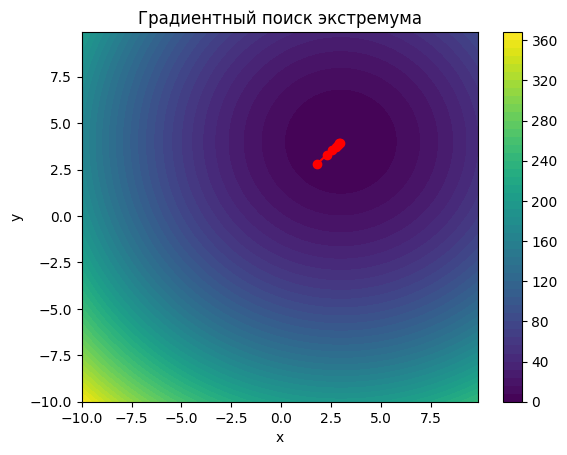

      x     y  новый x  новый y  значение  модуль
0    -4    -4     1.80     2.80      2.88    2.88
1  -2.4  -2.4     2.28     3.28      1.04    1.04
2 -1.44 -1.44     2.57     3.57      0.37    0.37
3 -0.86 -0.86     2.74     3.74      0.13    0.13
4 -0.52 -0.52     2.84     3.84      0.05    0.05
5 -0.31 -0.31     2.91     3.91      0.02    0.02
6 -0.19 -0.19     2.94     3.94      0.01    0.01


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def abs1(x):
    return (x*x)**0.5

def gradient_descent():
    x = 1
    y = 2
    step_size = 0.2
    precision = 0.01

    df2 = pd.DataFrame(columns=['x','y','новый x','новый y','значение','модуль'])
    x_history = []
    y_history = []

    while True:
        gradient_x = 2 * (x - 3)
        gradient_y = 2 * (y - 4)

        x -= step_size * gradient_x
        y -= step_size * gradient_y
        x_history.append(x)
        y_history.append(y)
        function_value = (x - 3) ** 2 + (y - 4) ** 2

        mod = abs1(function_value)
        mod = round(mod,2)
        print(x,' ',y,' ',function_value,' ',mod,' ',gradient_x,' ',gradient_y)
        df2 = pd.concat([df2, pd.DataFrame({'x': [round(gradient_x, 2)],
                                            'y': [round(gradient_y, 2)],
                                            'новый x': [round(x, 2)],
                                            'новый y': [round(y, 2)],
                                            'значение': [round(function_value, 2)],
                                            'модуль': [round(mod, 2)]})], ignore_index=True)

        if abs(function_value) < precision:
            break

    x_range = np.arange(-10, 10, 0.1)
    y_range = np.arange(-10, 10, 0.1)
    X, Y = np.meshgrid(x_range, y_range)
    Z = (X - 3) ** 2 + (Y - 4) ** 2

    plt.contourf(X, Y, Z, levels=50, cmap='viridis')
    plt.colorbar()
    plt.plot(x_history, y_history, '-o', color='red')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Градиентный поиск экстремума')
    plt.show()

    return df2

df2 = gradient_descent()
print(df2)


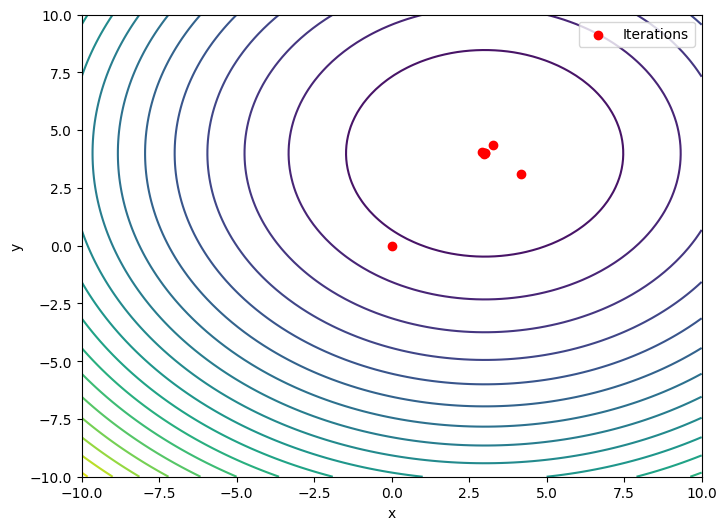

      x     y
0  4.17  3.12
1  3.26  4.34
2  2.90  4.07
3  2.98  3.97
4  3.01  3.99
5  3.00  4.00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def newton_raphson(x, y):
    f = (x-3)**2 + (y-4)**2
    dfdx = 2*(x-3)
    dfdy = 2*(y-4)
    x_new = x - f/dfdx
    y_new = y - f/dfdy
    return x_new, y_new

def plot_gradient_descent(x_history, y_history):
    x = np.linspace(-10, 10, 100)
    y = np.linspace(-10, 10, 100)
    X, Y = np.meshgrid(x, y)
    Z = (X-3)**2 + (Y-4)**2
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.contour(X, Y, Z, levels=20)
    ax.scatter(x_history, y_history, color='red', marker='o', label='Iterations')
    ax.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

def newton_raphson_minimization(x_init, y_init):
    x_history = [x_init]
    y_history = [y_init]
    df3 = pd.DataFrame(columns=['x', 'y'])
    while True:
        x_new, y_new = newton_raphson(x_init, y_init)
        x_history.append(x_new)
        y_history.append(y_new)
        df3 = pd.concat([df3, pd.DataFrame({'x': [round(x_new, 2)], 'y': [round(y_new, 2)]})], ignore_index=True)
        if abs(x_new - x_init) < 0.01 and abs(y_new - y_init) < 0.01:
            break
        x_init = x_new
        y_init = y_new
    return x_history, y_history, df3

x_init = 0
y_init = 0
x_history, y_history, df3 = newton_raphson_minimization(x_init, y_init)

plot_gradient_descent(x_history, y_history)

print(df3)

Результат:
x = 0.02361001400141846
y = 2.9834935082965868
f(x, y) = 9.892182796427818


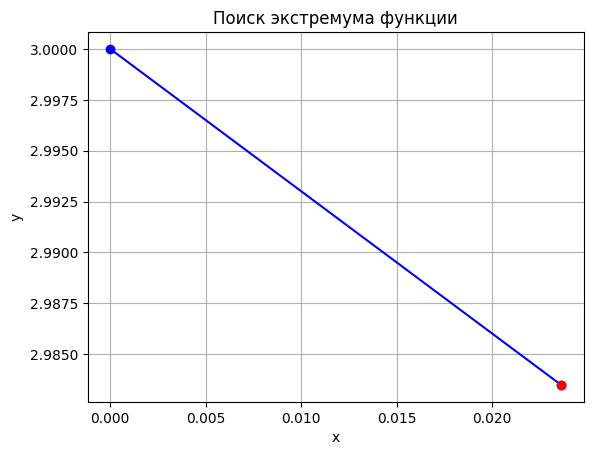

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return (x - 3)**2 + (y - 4)**2

def approximate_extremum(f, start_point, accuracy, step):
    x, y = start_point
    x_vals = [x]
    y_vals = [y]

    while True:
        delta_x = np.random.uniform(-step, step)
        delta_y = np.random.uniform(-step, step)

        new_x = x + delta_x
        new_y = y + delta_y

        if f(new_x, new_y) < f(x, y):
            x = new_x
            y = new_y
            x_vals.append(x)
            y_vals.append(y)

        if abs(f(x, y) - f(x_vals[-1], y_vals[-1])) < accuracy:
            break

    return x, y, f(x, y), x_vals, y_vals

start_point = [0, 3]

accuracy = 0.01

step = 0.2

x_res, y_res, f_res, x_vals, y_vals = approximate_extremum(f, start_point, accuracy, step)

print("Результат:")
print("x =", x_res)
print("y =", y_res)
print("f(x, y) =", f_res)

plt.plot(x_vals, y_vals, 'bo-')
plt.plot(x_res, y_res, 'ro')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Поиск экстремума функции")
plt.grid()
plt.show()

In [ ]:
#барьерные поверхности, 4 лаба если по порядку.
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Определяем функцию
def f(params):
    x, y = params
    return x + 4*y + x*y - 2*x**2 - 2*y**2

# Определяем ограничения
def constraint1(params):
    x, y = params
    return 12 - x - 2*y

def constraint2(params):
    x, y = params
    return 15 - 3*x - y

constraints = [{'type': 'ineq', 'fun': constraint1},
               {'type': 'ineq', 'fun': constraint2}]

# Определяем функцию барьерной поверхности
def barrier_function(params, r):
    return f(params) - r * (np.log(-constraint1(params)) + np.log(-constraint2(params)))

# Определяем градиент барьерной поверхности
def barrier_gradient(params, r):
    x, y = params
    grad1 = np.array([2*x**2 - y + 12 - x, 4 - 2*y + 2*x])
    grad2 = np.array([6 - 2*x - y, 4 - 2*x + 2*y])
    return grad1 / constraint1(params) + grad2 / constraint2(params)

# Определяем начальную точку и параметры метода
x0 = np.array([0, 1])
r = 10
alpha = 0.1

# Итеративно находим экстремум
while r > 1e-5:
    minimize_result = minimize(barrier_function, x0, args=(r,), method='SLSQP', jac=barrier_gradient, constraints=constraints)
    x0 = minimize_result.x
    r *= alpha

# Выводим найденное решение
print("x =", x0[0])
print("y =", x0[1])
print("f(x, y) =", f(x0))

# Отображаем график функции
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = f([X, Y])
plt.contourf(X, Y, Z, levels=100, cmap='jet')
plt.colorbar()
plt.scatter(x0[0], x0[1], color='red', label='Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.title('f(x, y)')
plt.legend()
plt.show()


Результат:
x = 2
y = 4
f(x, y) = 1


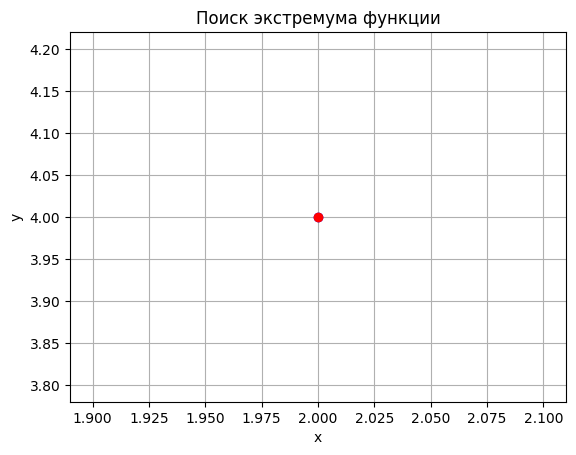

In [ ]:
# аппроксимация столахтическая
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return (x - 3)**2 + (y - 4)**2

def approximate_extremum(f, start_point, accuracy, step):
    x, y = start_point
    x_vals = [x]
    y_vals = [y]
    j=1
    while True:
        delta_x = np.random.uniform(-step, step)
        delta_y = np.random.uniform(-step, step)

        step = (step/j)
        j+=1

        new_x = x + delta_x
        new_y = y + delta_y

        if f(new_x, new_y) < f(x, y):
            x = new_x
            y = new_y
            x_vals.append(x)
            y_vals.append(y)

        if abs(f(x, y) - f(x_vals[-1], y_vals[-1])) < accuracy:
            break

    return x, y, f(x, y), x_vals, y_vals

# Начальная точка
start_point = [2, 4]

# Точность
accuracy = 0.01

# Шаг
step = 0.2

# Вызываем функцию аппроксимации экстремума
x_res, y_res, f_res, x_vals, y_vals = approximate_extremum(f, start_point, accuracy, step)

print("Результат:")
print("x =", x_res)
print("y =", y_res)
print("f(x, y) =", f_res)

# График поиска экстремума
plt.plot(x_vals, y_vals, 'bo-')
plt.plot(x_res, y_res, 'ro')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Поиск экстремума функции")
plt.grid()
plt.show()

In [ ]:
#лаба 6 (нужна, вместо барьеров) 3 метода монте-карло в 3 блоках. вариант 6 везде.
#функция f(x) = cos(x), где a = 0, b = 2 и на разных значениях n (10, 30, 50)
import random
import math

def monte_carlo(f, a, b, n):
    total = 0
    for _ in range(n):
        x = random.uniform(a, b)
        total += f(x)
    avg = total / n
    result = avg * (b - a)
    return result

def cos_func(x):
    return math.cos(x)

a = 0
b = 2
n_values = [10, 30, 50]

for n in n_values:
    result = monte_carlo(cos_func, a, b, n)
    print(f"на n={n}, результат: {result}")


на n=10, результат: 1.080150168423716
на n=30, результат: 0.9375963113652551
на n=50, результат: 0.8819377161930368


In [ ]:
#вычисление кратного интервала f(x) = x1^2 + x2^2 при условии 0.5 < x1 < 1, 0 < x2 < 2x - 1 и N = 100

import random

def monte_carlo_multiple(f, x1_min, x1_max, x2_min, x2_max, N):
    count = 0
    for _ in range(N):
        x1 = random.uniform(x1_min, x1_max)
        x2 = random.uniform(x2_min, x2_max)
        if f(x1, x2):
            count += 1
    result = (count / N) * (x1_max - x1_min) * (x2_max - x2_min)
    return result

def condition_func(x1, x2):
    return 0.5 < x1 < 1 and 0 < x2 < 2 * x1 - 1

x1_min = 0.5
x1_max = 1
x2_min = 0
x2_max = 2 * x1_max - 1
N = 100

result = monte_carlo_multiple(condition_func, x1_min, x1_max, x2_min, x2_max, N)
print(f"результат: {result}")


результат: 0.285


In [ ]:
#Для условий стрельбы по мишени с миненем радиуса R = 1, с центром в (1, 1), и числом выстрелов N в диапазоне [100, 300] и числом n в диапазоне [5, 15]
import random
import math

def monte_carlo_shooting(N, n):
    count = 0
    for _ in range(N):
        hits = 0
        for _ in range(n):
            x = random.uniform(0, 2)
            y = random.uniform(0, 2)
            if math.sqrt((x - 1) ** 2 + (y - 1) ** 2) <= 1:
                hits += 1
        if hits == n:
            count += 1
    probability = count / N
    return probability

N_min = 100
N_max = 300
n_min = 5
n_max = 15

N = random.randint(N_min, N_max)
n = random.randint(n_min, n_max)

result = monte_carlo_shooting(N, n)
print(f"Вероятность попадания в цель: {result}")


Вероятность попадания в цель: 0.015267175572519083
